In [1]:
## 출처: 직장인을 위한 데이터 분석 실무 파이썬
# 1. 데이터 불러오기
import pandas as pd
kto_201901 = pd.read_excel('./files/kto_201902.xlsx',
                           header = 1,
                           usecols = 'A:G',
                           skipfooter = 4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,807654,10554,1491,58893,155494,1034086
1,일본,204697,2125,119,2084,4175,213200
2,대만,92276,105,20,908,1250,94559
3,홍콩,49695,54,3,489,1071,51312
4,마카오,3890,1,0,33,42,3966


In [2]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,1142,806,58,520,950,3476
63,기타대륙,24,1,0,3,11,39
64,국적미상,24,1,0,3,11,39
65,교포소계,0,0,0,0,14459,14459
66,교포,0,0,0,0,14459,14459


In [3]:
# 2. 데이터 전처리, 1)데이터 탐색
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,6.700000e+01
mean,27102.328358,389.880597,113.104478,1933.134328,6336.238806,3.587469e+04
std,107995.380245,1365.005733,382.986080,8557.846722,21715.773519,1.384832e+05
min,0.000000,0.000000,0.000000,0.000000,11.000000,3.900000e+01
25%,453.500000,12.500000,2.000000,43.000000,209.500000,9.300000e+02
50%,1221.000000,45.000000,8.000000,147.000000,931.000000,2.674000e+03
75%,7532.000000,148.500000,39.500000,504.500000,2870.500000,1.208650e+04
max,807654.000000,10554.000000,2041.000000,58893.000000,155494.000000,1.034086e+06


In [5]:
#각 칼럼 0인 부분 필터링
condition = (kto_201901['관광'] == 0)\
             | (kto_201901['상용'] == 0)\
             | (kto_201901['공용'] == 0)\
             | (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,3890,1,0,33,42,3966
13,스리랑카,241,52,0,48,1175,1516
38,스위스,710,17,0,67,83,877
45,그리스,381,27,0,5,194,607
46,포르투갈,545,5,0,19,101,670
48,아일랜드,389,7,0,14,203,613
53,불가리아,146,0,1,15,164,326
54,폴란드,619,14,0,74,559,1266
59,대양주 기타,325,0,5,2,96,428
63,기타대륙,24,1,0,3,11,39


In [6]:
# 데이터프레임에 기준년월 추가
kto_201901['기준년월'] ='2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,807654,10554,1491,58893,155494,1034086,2019-01
1,일본,204697,2125,119,2084,4175,213200,2019-01
2,대만,92276,105,20,908,1250,94559,2019-01
3,홍콩,49695,54,3,489,1071,51312,2019-01
4,마카오,3890,1,0,33,42,3966,2019-01


In [25]:
#국적 데이터만 남기기, unique()는 칼럼 내 중복을 제거한 값들을 보여주는 함수, 원소를 보여주는 함수
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [8]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [26]:
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [27]:
kto_201901_country.head()
# 인덱스 0이 아닌 1부터 시작. 그 이유는 kto_201901_country 데이터가 kto_201901에서 필터링한 결과를 저장한 데이터이기 때문. 원본인
#kto_201901 데이터에서 일본의 인덱스 값인 1번이 그대로 따라온 것. kto_201901_country의 인덱스 값에는 기존 데이터에서 대륙에 해당하는 값 누락됨
#따라서 인덱스 값을 초기화하는 것이 좋음

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,204697,2125,119,2084,4175,213200,2019-01
2,대만,92276,105,20,908,1250,94559,2019-01
3,홍콩,49695,54,3,489,1071,51312,2019-01
4,마카오,3890,1,0,33,42,3966,2019-01
5,태국,32074,56,180,332,6578,39220,2019-01


In [28]:
#인덱스 재설정
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True) #drop = True 쓰지 않는 경우 기존 인덱스 값이 새로운 칼럼으로 생성됨.
kto_201901_country_newindex.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,204697,2125,119,2084,4175,213200,2019-01
1,대만,92276,105,20,908,1250,94559,2019-01
2,홍콩,49695,54,3,489,1071,51312,2019-01
3,마카오,3890,1,0,33,42,3966,2019-01
4,태국,32074,56,180,332,6578,39220,2019-01


In [14]:
#대륙 칼럼 만들기
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [29]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아
1,대만,92276,105,20,908,1250,94559,2019-01,아시아
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아
3,마카오,3890,1,0,33,42,3966,2019-01,아시아
4,태국,32074,56,180,332,6578,39220,2019-01,아시아


In [30]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,325,0,5,2,96,428,2019-01,오세아니아
56,남아프리카공화국,374,6,5,8,798,1191,2019-01,아프리카
57,아프리카 기타,1142,806,58,520,950,3476,2019-01,아프리카
58,국적미상,24,1,0,3,11,39,2019-01,기타대륙
59,교포,0,0,0,0,14459,14459,2019-01,교포


In [31]:
#국적별 관광객 비율 살펴보기
kto_201901_country_newindex['관광객비율(%)'] = \
 round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아,96.0
1,대만,92276,105,20,908,1250,94559,2019-01,아시아,97.6
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아,96.8
3,마카오,3890,1,0,33,42,3966,2019-01,아시아,98.1
4,태국,32074,56,180,332,6578,39220,2019-01,아시아,81.8


In [32]:
#관광객비율(%) 칼럼으로 내림차순 정렬
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
3,마카오,3890,1,0,33,42,3966,2019-01,아시아,98.1
1,대만,92276,105,20,908,1250,94559,2019-01,아시아,97.6
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아,96.8
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아,96.0
19,이스라엘,694,15,1,14,37,761,2019-01,아시아,91.2


In [33]:
#관광객비율(%) 칼럼으로 오름차순 정렬
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,14459,14459,2019-01,교포,0.0
14,방글라데시,228,83,38,265,1042,1656,2019-01,아시아,13.8
12,스리랑카,241,52,0,48,1175,1516,2019-01,아시아,15.9
13,파키스탄,257,290,11,463,418,1439,2019-01,아시아,17.9
9,미얀마,1107,13,25,231,3991,5367,2019-01,아시아,20.6


In [34]:
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',
                                        index = '대륙',
                                        aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.500000
아메리카,64.540000
아시아,57.580000
아프리카,32.150000
오세아니아,74.500000
유럽,62.965217


In [35]:
#중국 국적만 필터링
condition = (kto_201901_country_newindex['국적'] == '중국')
kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,324291,2694,143,38731,87520,453379,2019-01,아시아,71.5


In [36]:
#2019년 1월에 우리나라를 방문하는 전체 외국인 관광객 숫자 구하기
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

907928

In [37]:
kto_201901_country_newindex['전체비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아,96.0,22.5
1,대만,92276,105,20,908,1250,94559,2019-01,아시아,97.6,10.2
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아,96.8,5.5
3,마카오,3890,1,0,33,42,3966,2019-01,아시아,98.1,0.4
4,태국,32074,56,180,332,6578,39220,2019-01,아시아,81.8,3.5


In [40]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,324291,2694,143,38731,87520,453379,2019-01,아시아,71.5,35.7
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아,96.0,22.5
1,대만,92276,105,20,908,1250,94559,2019-01,아시아,97.6,10.2
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아,96.8,5.5
25,미국,38475,386,1970,1144,15757,57732,2019-01,아메리카,66.6,4.2


In [41]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,324291,2694,143,38731,87520,453379,2019-01,아시아,71.5,35.7
0,일본,204697,2125,119,2084,4175,213200,2019-01,아시아,96.0,22.5
1,대만,92276,105,20,908,1250,94559,2019-01,아시아,97.6,10.2
2,홍콩,49695,54,3,489,1071,51312,2019-01,아시아,96.8,5.5
25,미국,38475,386,1970,1144,15757,57732,2019-01,아메리카,66.6,4.2


데이터 전처리 과정에는 데이터 탐색, 결측치 확인, 분석에 필요한 칼럼 생성, 데이터 정리 등의 과정이 포함됨. 데이터 전저치는 데이터를 분석에 적합한 형태로 만드는 과정이기도 하지만 데이터를 미시적으로 살펴봐야 하는 만큼 데이터에 대한 이해도를 이는 과정. 실무에서 더 꼼꼼한 데이터 전처리 과정이 필요함.

## 데이터 전처리 과정을 함수로 만들기
1. 불러올 데이터의 형태 파악
2. 엑셀 파일 파이썬으로 불러오기(pd.read_excel())
3. 데이터 탐색(info(),describe())
4. 기준년월 칼럼 추가
5. 국적 데이터만 남기기(대륙 데이터 제거)
6. 대륙 칼럼 만들기
7. 국적별 관광객비율(%) 살펴보기
8. 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

In [44]:
#2010년 1월부터 2020년 5월까지 총 125개의 파일에 대해 같은 작업을 반복해 하나의 파일로 합치기

def create_kto_data(yy, mm):
    #1. 불러올 엑셀 파일 경로를 지정
    file_path = f'./files/kto_{yy}{mm}.xlsx'
    
    #2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header =1, skipfooter = 4, usecols = 'A:G')
    
    #3. "기준년월" 칼럼 추가
    df['기준년월'] = f'{yy}-{mm}'
    
    #4. "국적" 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] #제거할 대륙명 선정하기
    condition = (df['국적'].isin(ignore_list) == False) #대륙 미포함 조건
    df_country = df[condition].reset_index(drop=True)
    
    #5. "대륙" 칼럼 추가
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    #대륙 칼럼 생성을 위한 목록 만들어 놓기
    df_country['대륙'] = continents
    
    #6. 국가별 "관광객비율(%)" 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 *100, 1)
    
    #7. "전체비율(%)" 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    #8. 결과 출력
    return(df_country)    

In [45]:
#create_kto_data()함수를 활용해 2018년 12월 데이터 불러오기
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [ ]:
#반복문을 통해 다수의 엑셀 데이터를 불러와서 합치기 kto_yyyymm.xlsx
#1. yyyy에는 2010~2020까지 순차적으로 들어감
#2. 하나의 yyyy에 대해 mm에는 1~12의 값이 순차적으로 들어감.
#3. 이때 mm에는 "01", "02", "03", ...., "12"와 같이 두 자리 문자로 구성돼야 함.

In [46]:
for yy in range(2010,2021):
    for mm in range(1, 13):
        yymm = f'{yy}{mm}'
        print(yymm) #mm 두자리 문자로 표현하는 것 반영되지 않음.

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012


In [48]:
mm = 1
print(mm)

1


In [49]:
#zfill()함수 이용 -1(0을 포함한 두 자리로 출력하기)
print(str(mm).zfill(2))

01


In [50]:
print(str(mm).zfill(3))
print(str(mm).zfill(4))

001
0001


In [51]:
#6자리로 정렬해서 기준년월 출력하기
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = f'{yy}{mm_str}'
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [52]:
#먼저 데이터를 담을 빈 데이터프레임 만들기
df = pd.DataFrame()

In [53]:
#패턴 분석 결과를 이중 반복문을 통해 구현
for yy in range(2010, 2021):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index = True) #2020년 06월 데이터 존재하지 않기 때문에 에러 생김

FileNotFoundError: [Errno 2] No such file or directory: './files/kto_201909.xlsx'

In [54]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [55]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


In [58]:
#실제로는 문제가 없지만 이렇게 오류가 나는 경우를 출력하지 않고 싶을 때는 try/except 구문 사용
df = pd.DataFrame()

#패턴 분석 결과를 이중 반복문을 통해 구현
for yy in range(2010, 2021):
    for mm in range(1, 13):
#try 이하 구문을 실행
        try: 
        #앞에서 만든 create_kto_data 함수로 엑셀 데이터를 temp에 불러오기
            temp = create_kto_data(str(yy), str(mm).zfill(2))
        
        # temp로 불러온 데이터를 df 밑으로 추가
            df = df.append(temp, ignore_index = True)

        #만약 try 구문에서 에러가 발생하면 except 이후를 실행
        except:
            pass

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [61]:
#통한된 데이터를 엑셀 파일로 저장하기
df.to_excel('./files/kto_totla.xlsx', index = False)

In [62]:
#국적별 필터링된 데이터를 엑셀 파일로 저장하기
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [63]:
#중국인 관광객 파일 저장
file_path = './files/[국적별 관광객 데이터] 중국.xlsx'
df_filter.to_excel(file_path, index = False)

In [64]:
#국적 리스트 만들기
cntry_list = df['국적'].unique()
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [65]:
len(cntry_list)

60

In [66]:
#개별 국적별 관광객 데이터 저장하기
for cntry in cntry_list:
    #국적으로 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    #국적명을 반영한 파일명 만들기
    file_path = f'./files/[국적별 관광객 데이터] {cntry}.xlsx'
    
    #정해 놓은 파일명으로 저장하기
    df_filter.to_excel(file_path, index = False)

## 데이터 시각화

In [67]:
import pandas as pd
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [72]:
#그래프에서 한글을 표기하기 위한 글꼴 변경(
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [73]:
import matplotlib.pyplot as plt

In [74]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [76]:
%matplotlib inline

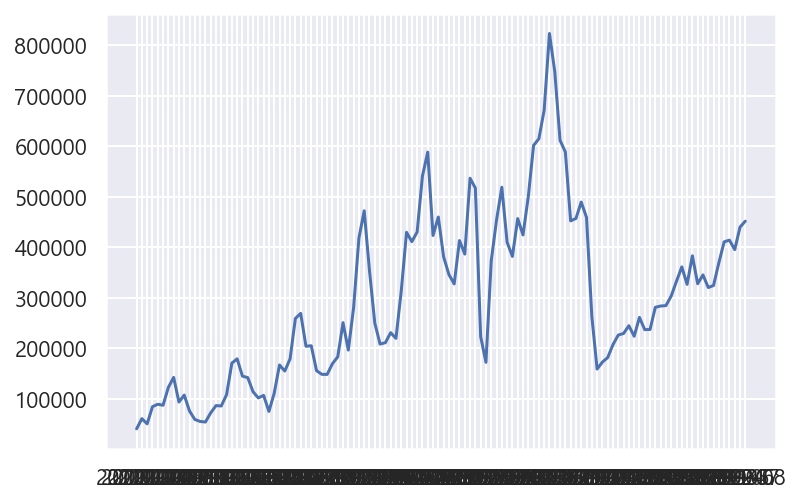

In [77]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

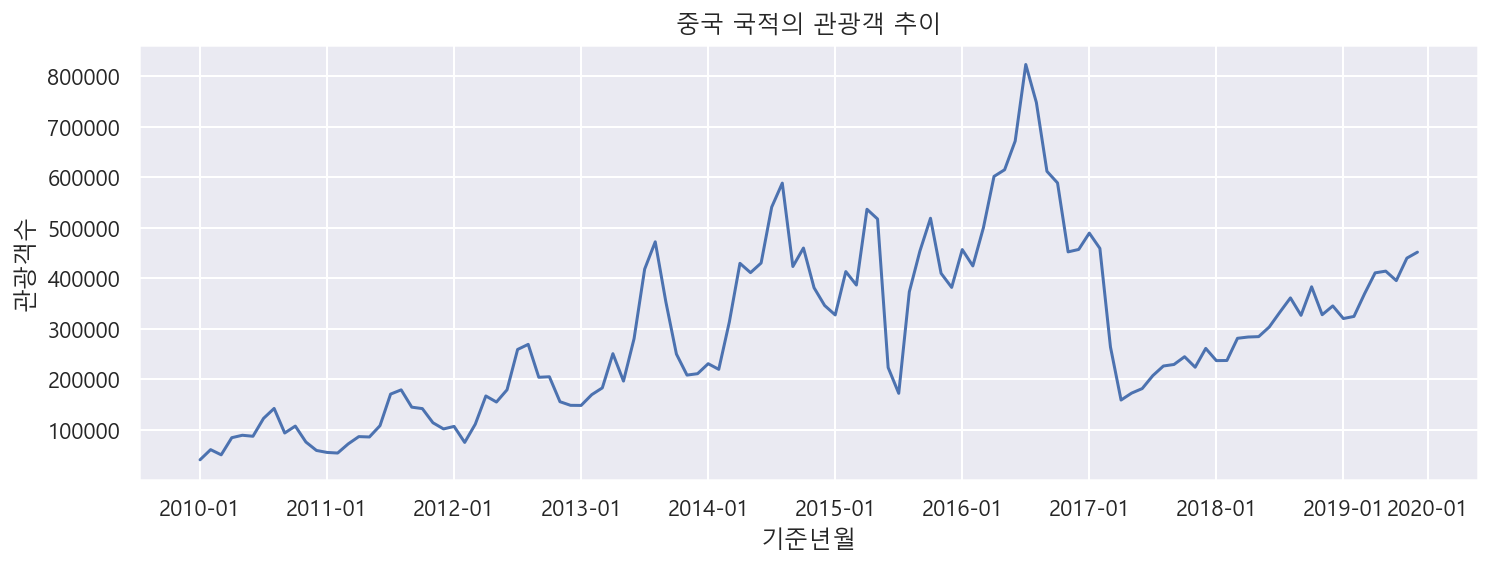

In [78]:
#시계열 그래프 꾸미기 2
plt.figure(figsize = (12, 4)) #그래프 크기를 결정, 가로 12인치, 세로 4인치

#그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광']) #x축, y축 변수 출력

#그래프, 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이') #그래프 제목
plt.xlabel('기준년월') #x축 이름
plt.ylabel('관광객수') #y축 이름

#x 축 눈금 값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

#그래프 표현하기
plt.show()

In [79]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

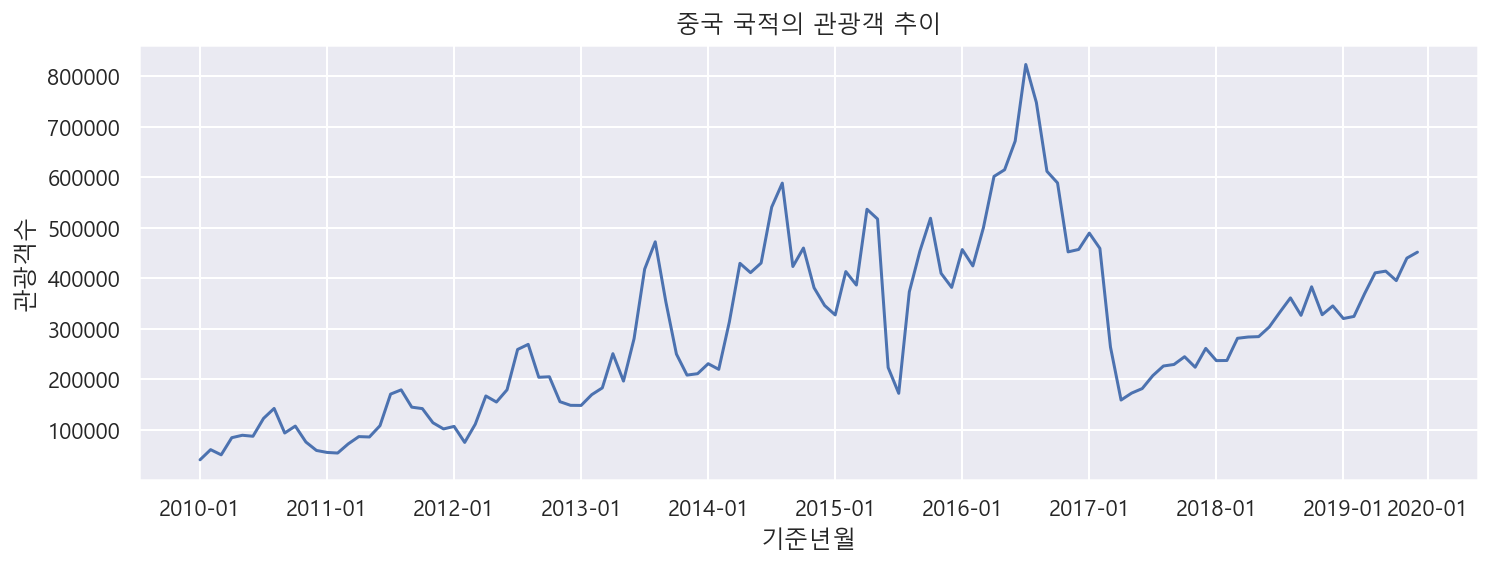

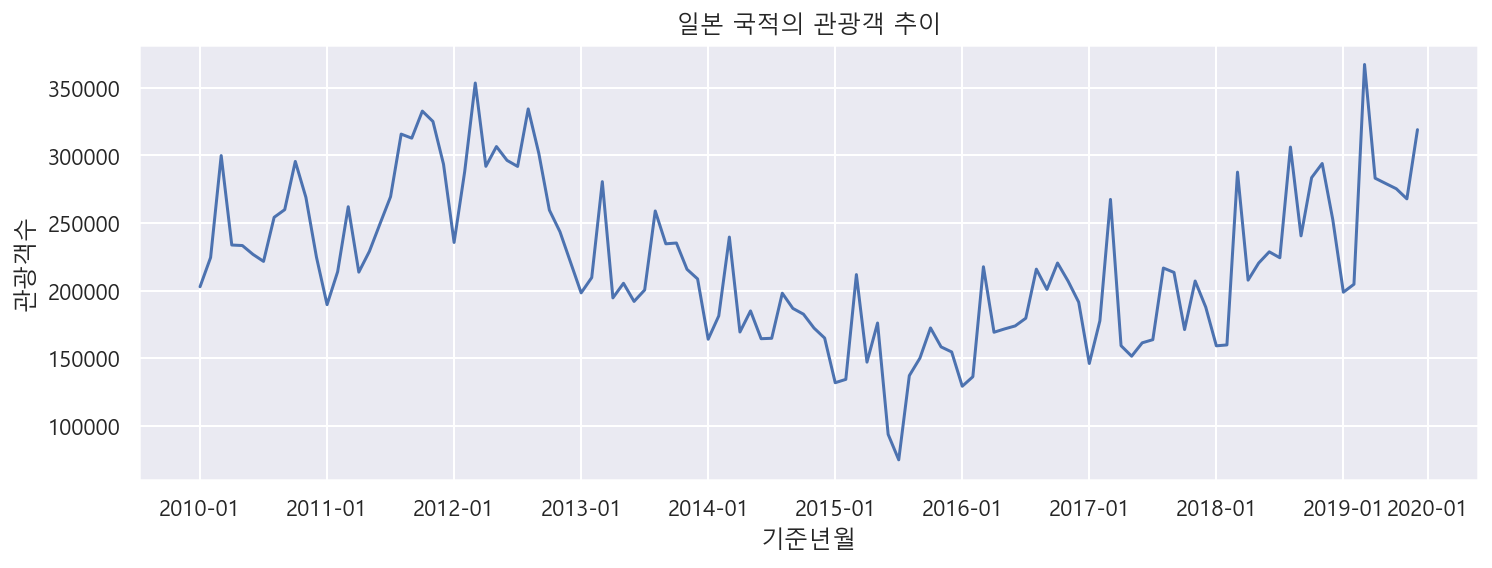

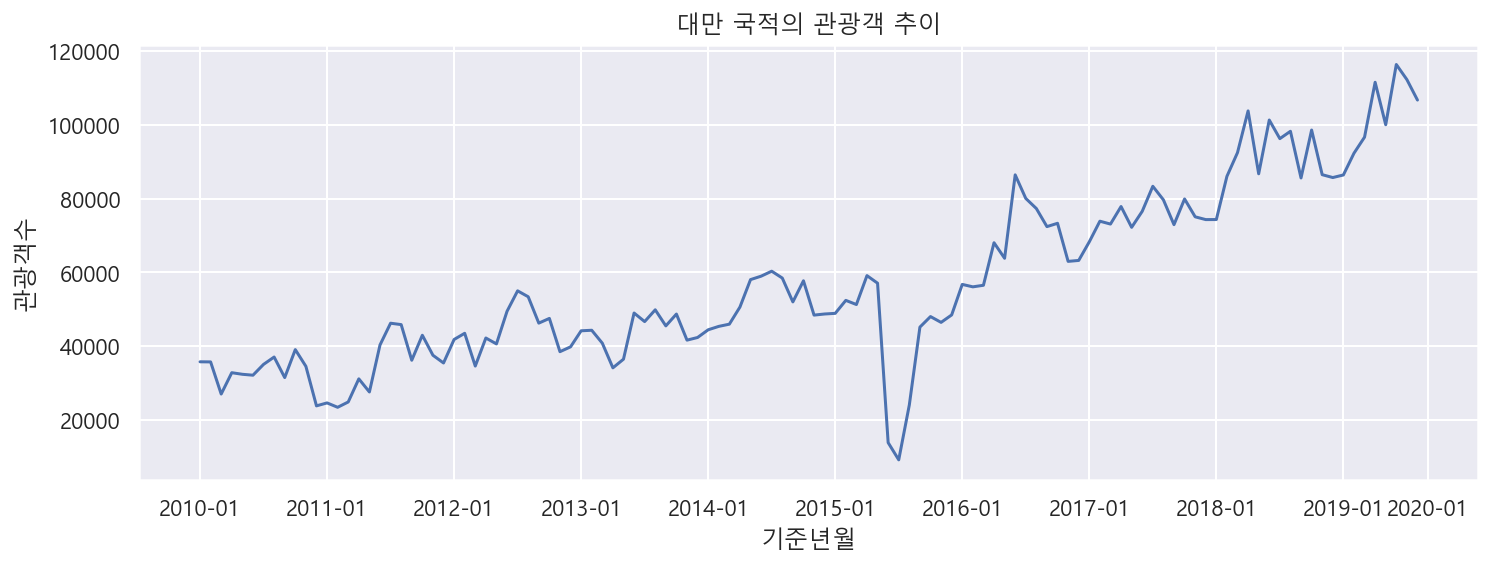

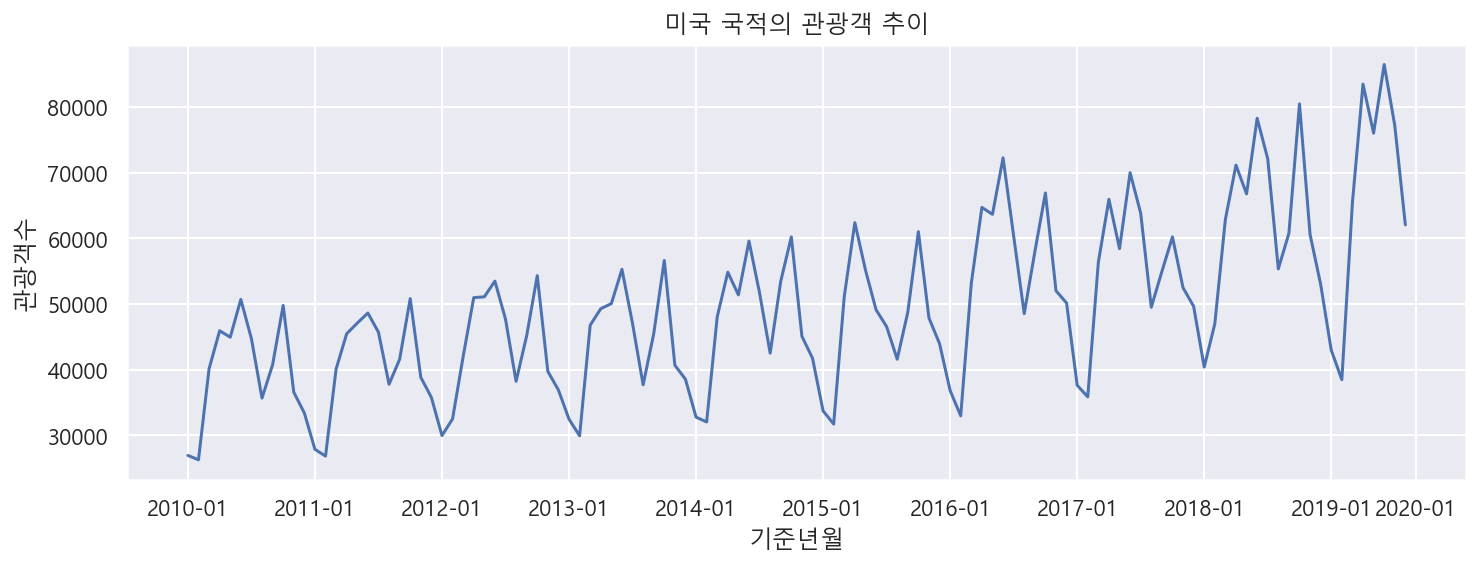

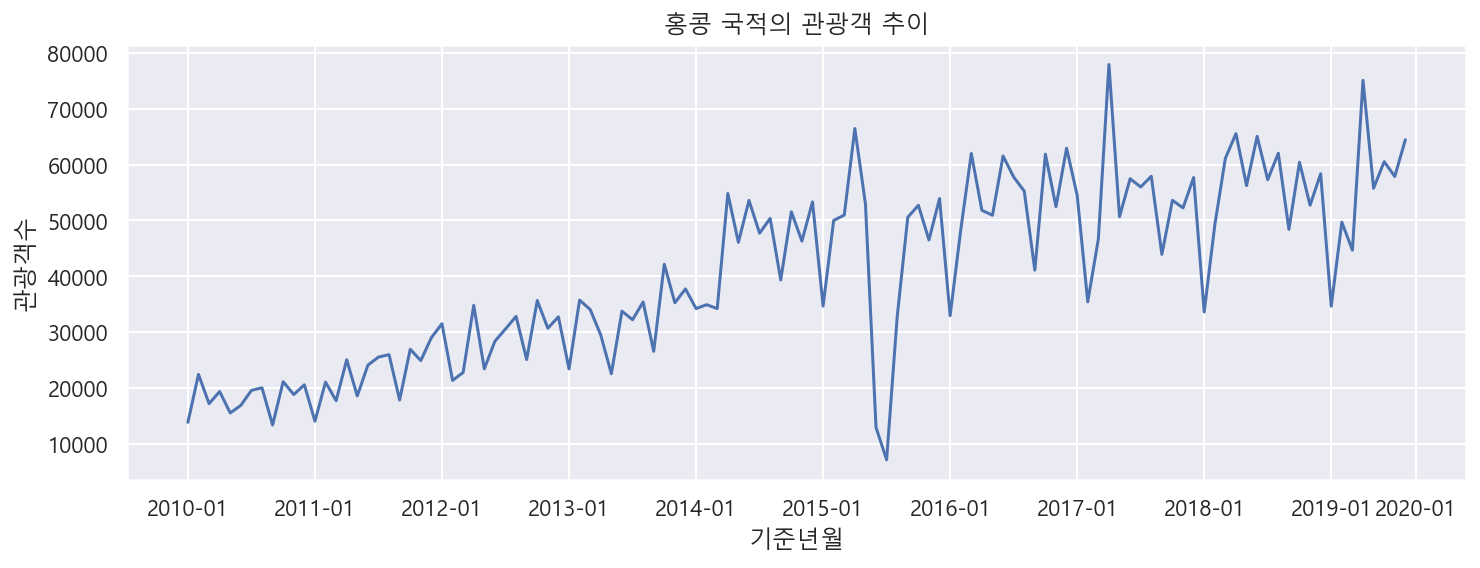

In [80]:
for cntry in cntry_list:
    #국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    #그래프 그리기
    #그래프 크기 조절
    plt.figure(figsize = (12, 4))
    
    ##그래프 내용 설정
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    ## 그래프 타이틀, X축, Y축 이름 달기
    plt.title(f'{cntry} 국적의 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    ## x 축 눈금 값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    
    ## 그래프 출력
    plt.show()

## 히트맵 그리기
seabor 라이브러리 (matplotlib에서 지원하지 않음.)

In [87]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [88]:
df['년도'] = df['기준년월'].str.slice(0, 4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [89]:
#중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [90]:
#pivot_table()함수 이용
df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도', 
                                 columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [91]:
# seaborn 라이브러리는 matplotlib 라이브러리에 종속되기 때문에 seaborn import시 matplotlib 라이브러리 함께 import!
import matplotlib.pyplot as plt
import seaborn as sns

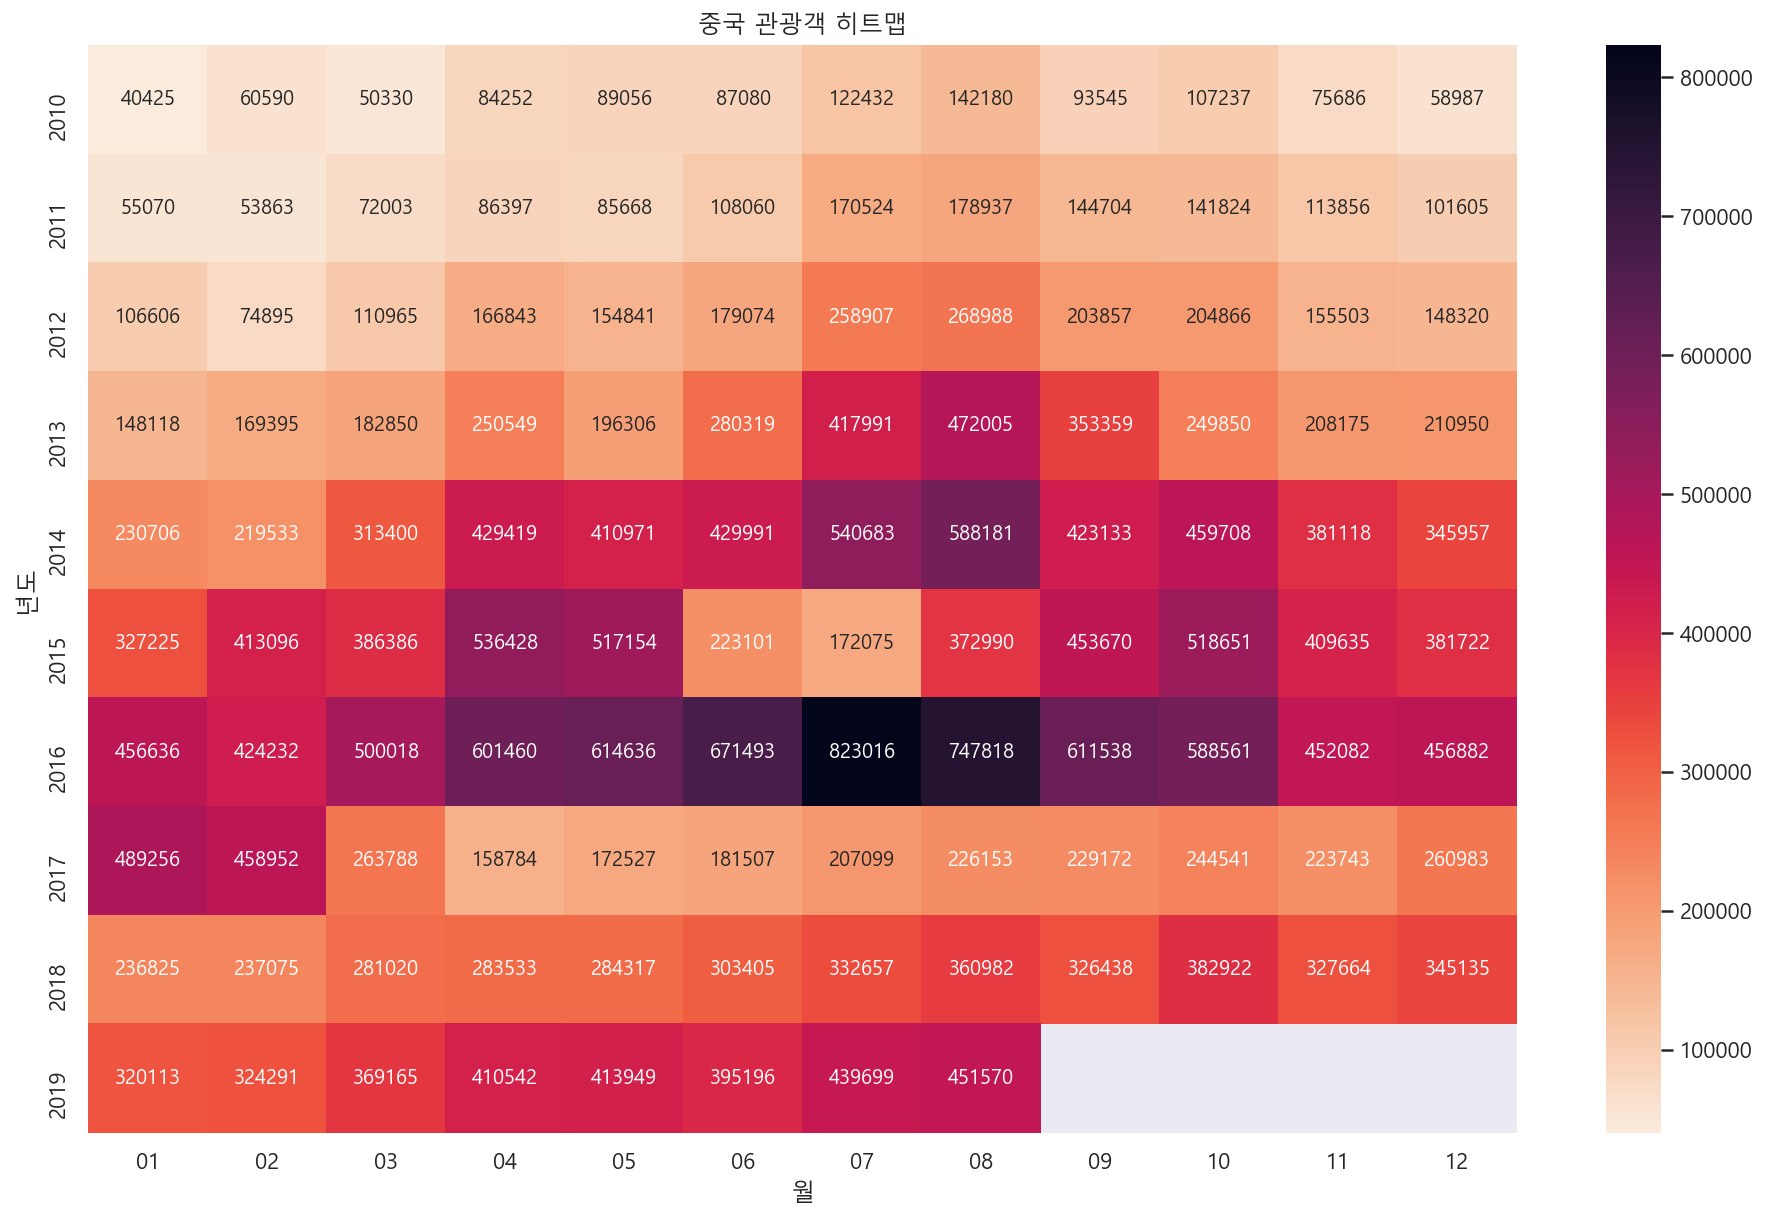

In [92]:
#그래프 크기 설정
plt.figure(figsize = (16, 10))

#히트맵 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
#히트맵 그래프로 나타낼 데이터 저장, annot = True 히트맵 그래프에 각 칸에 실제 값을 표시, fmt = '.0f' 숫자형태 소수점이 없는 실수형
#cmap = 'rocket_r' 그래프의 색깔 조합을 지정함.

#그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

#그래프 표현
plt.show()

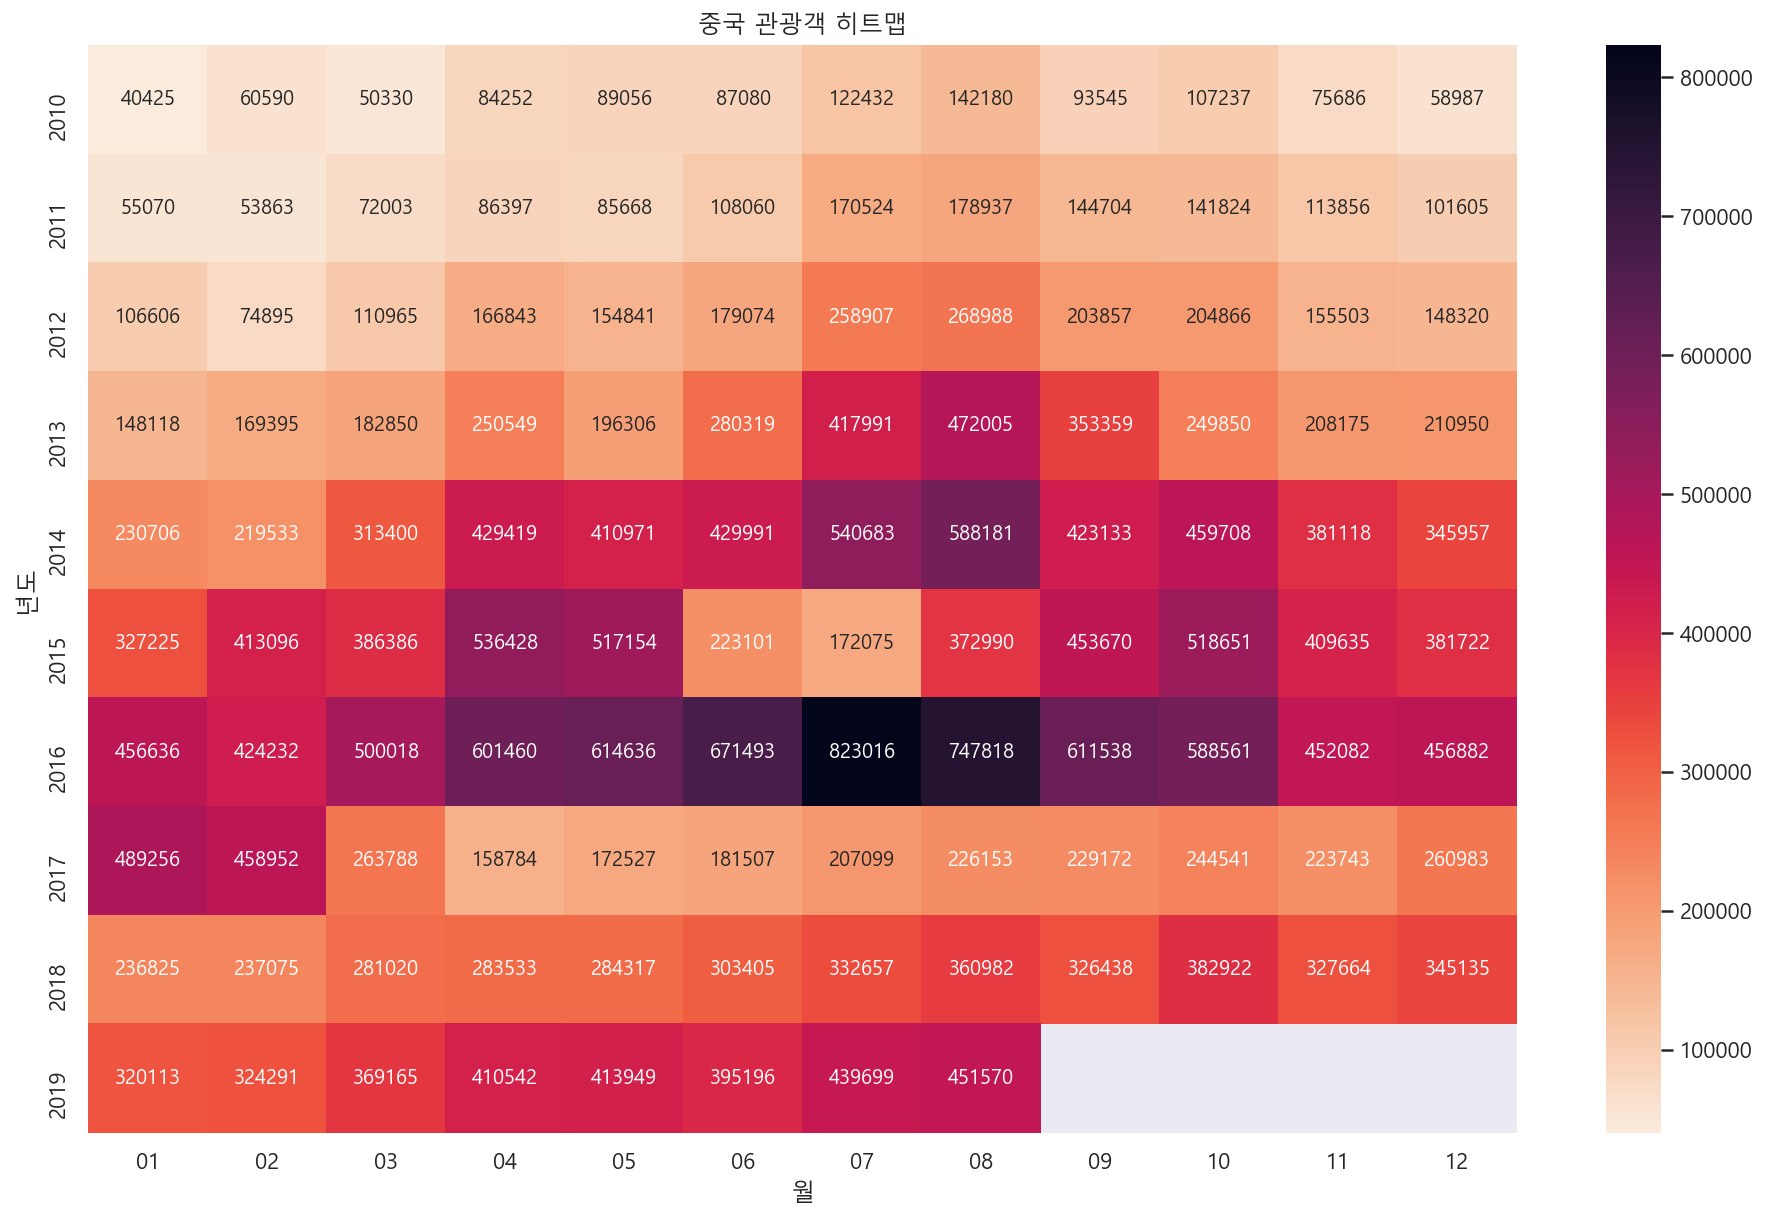

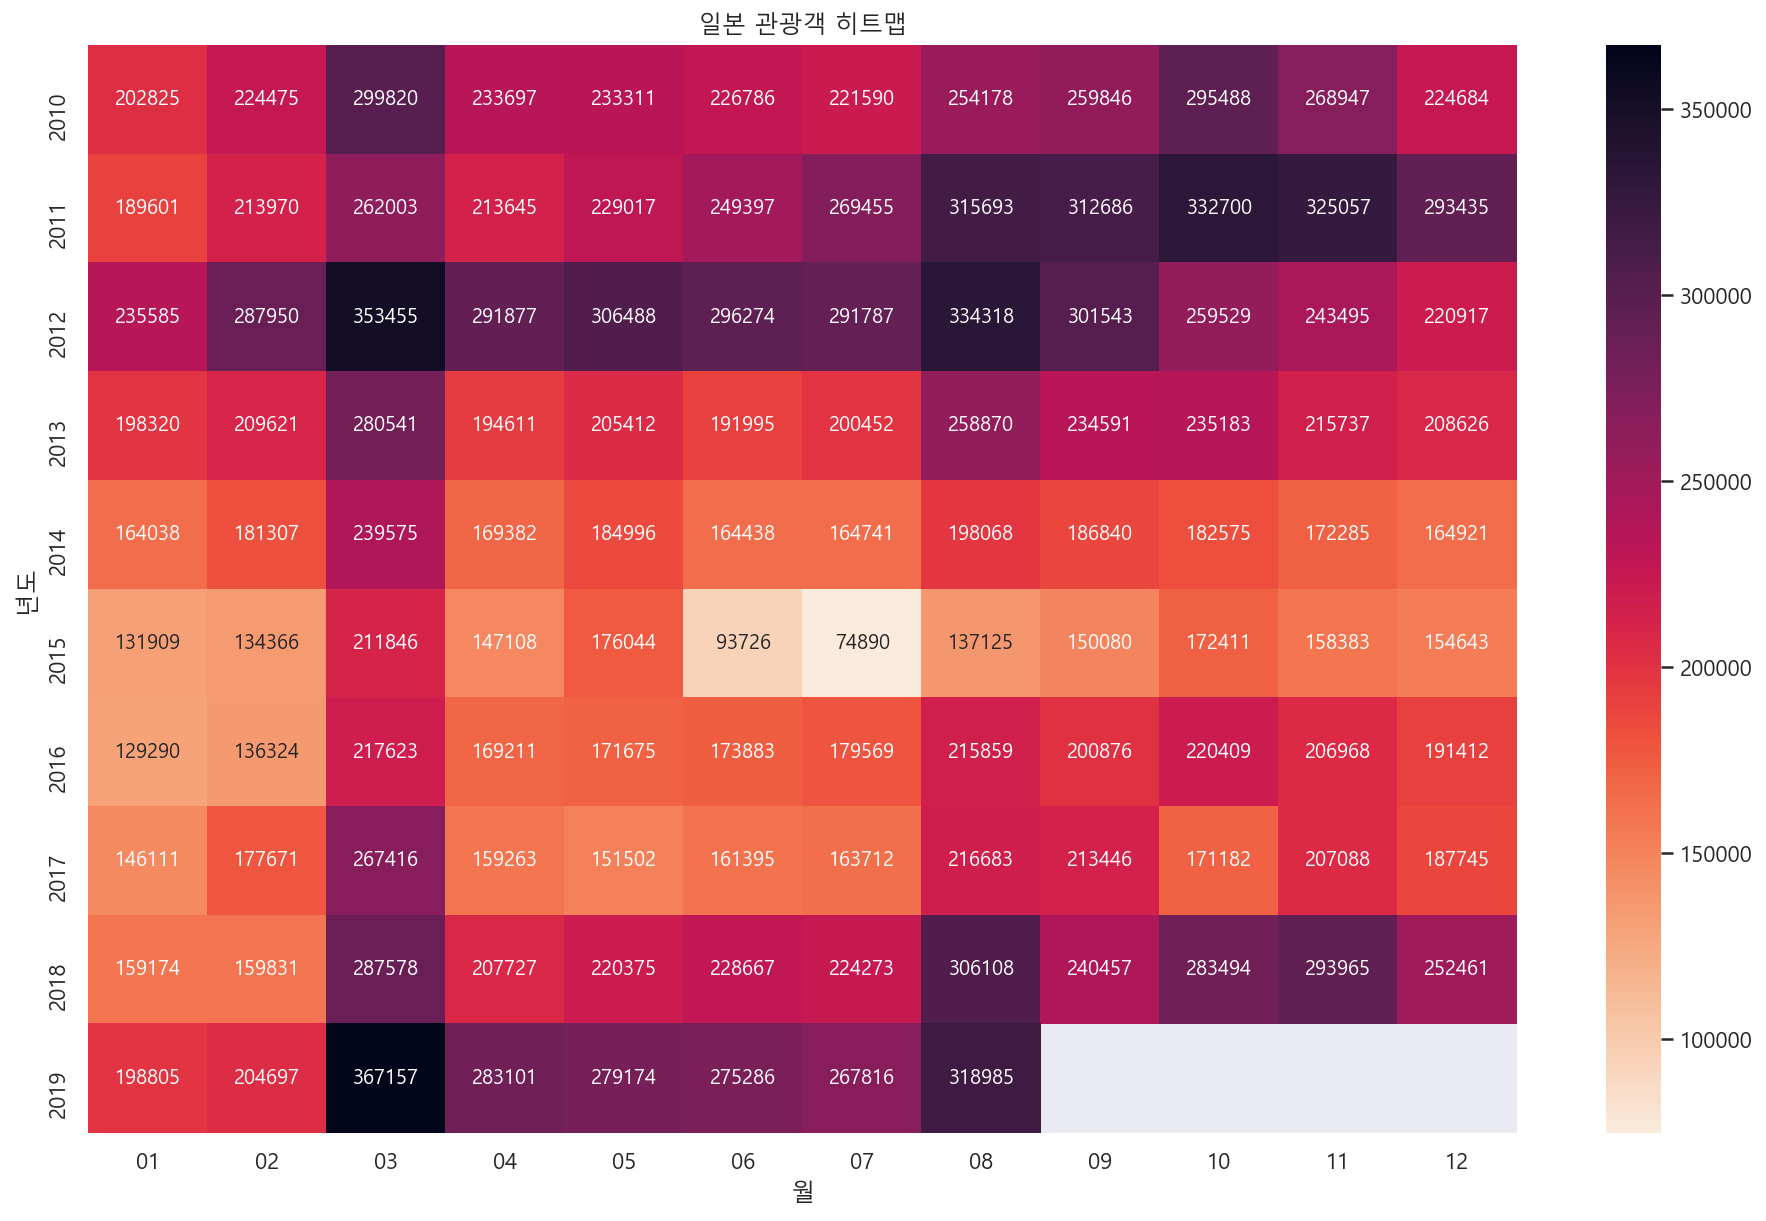

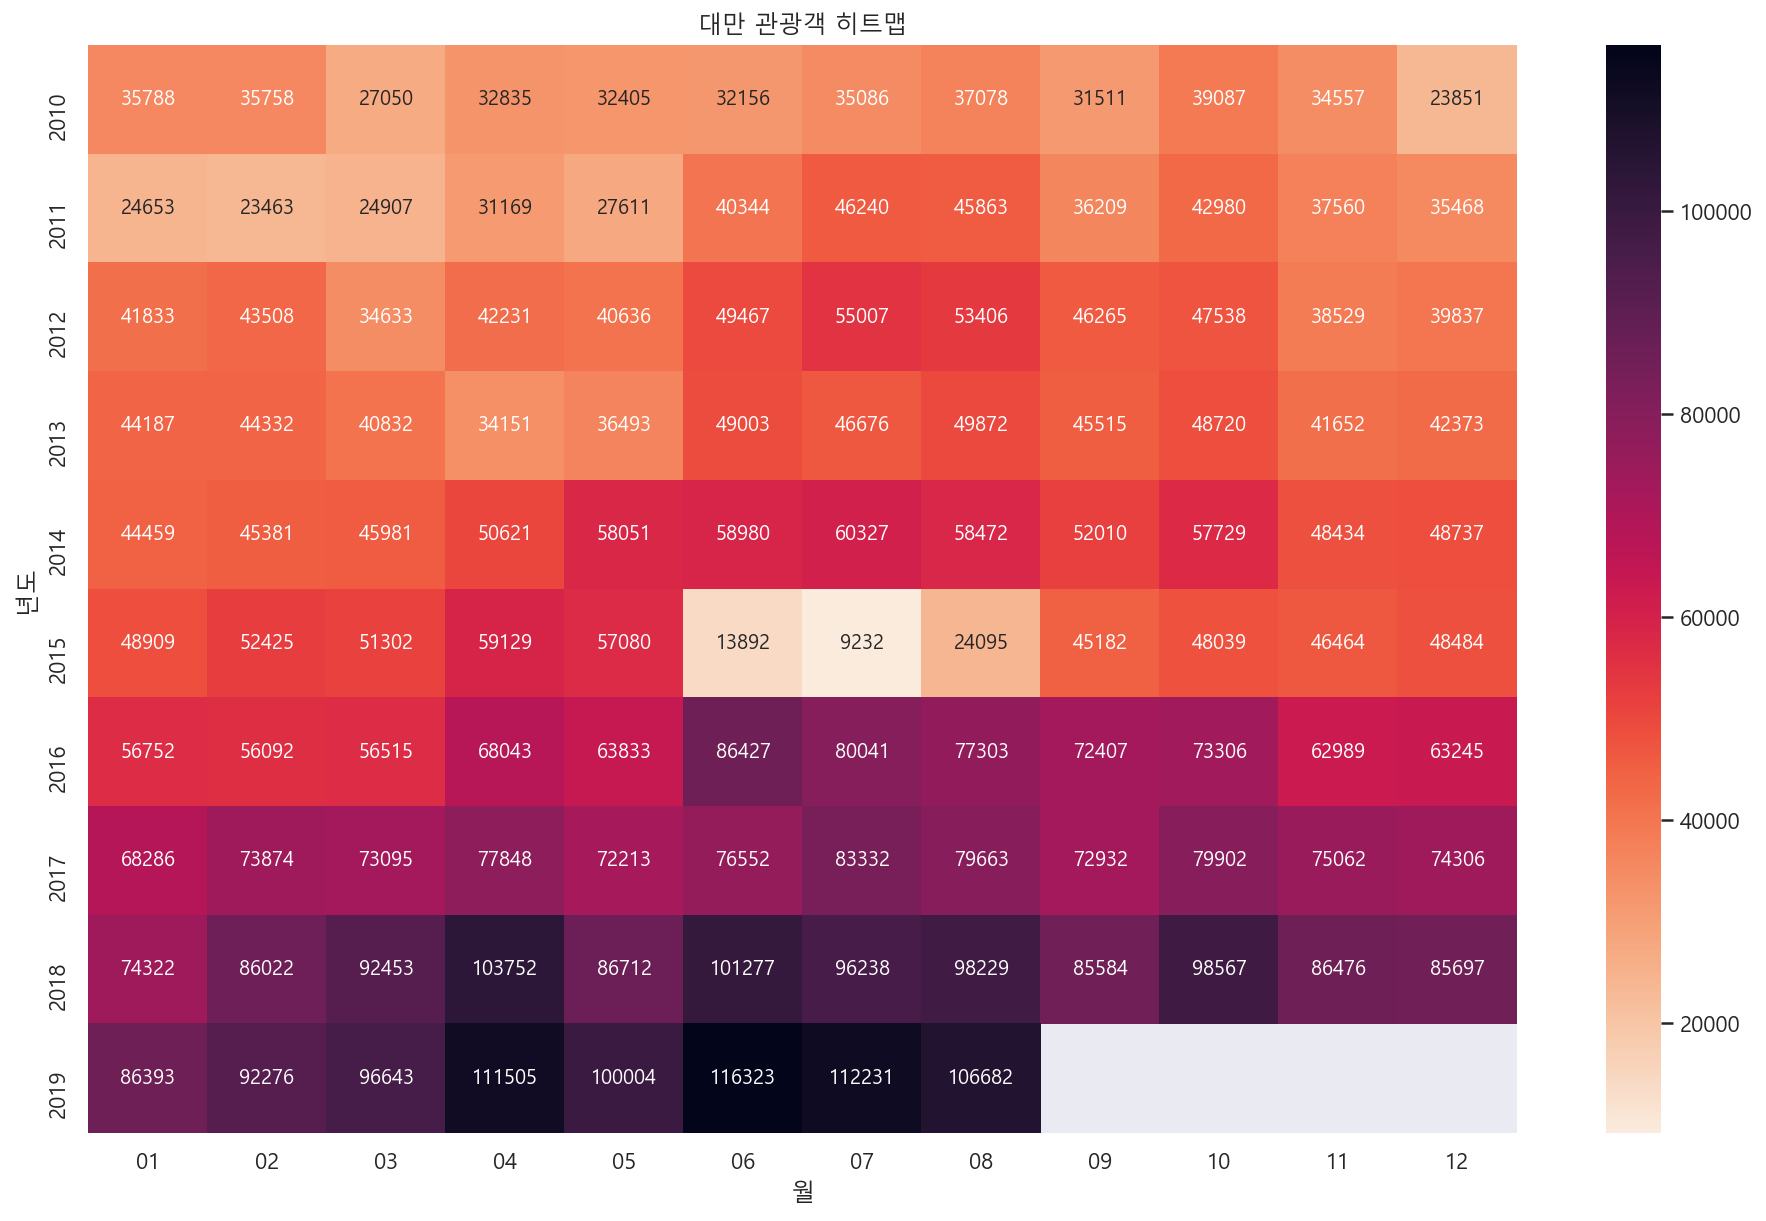

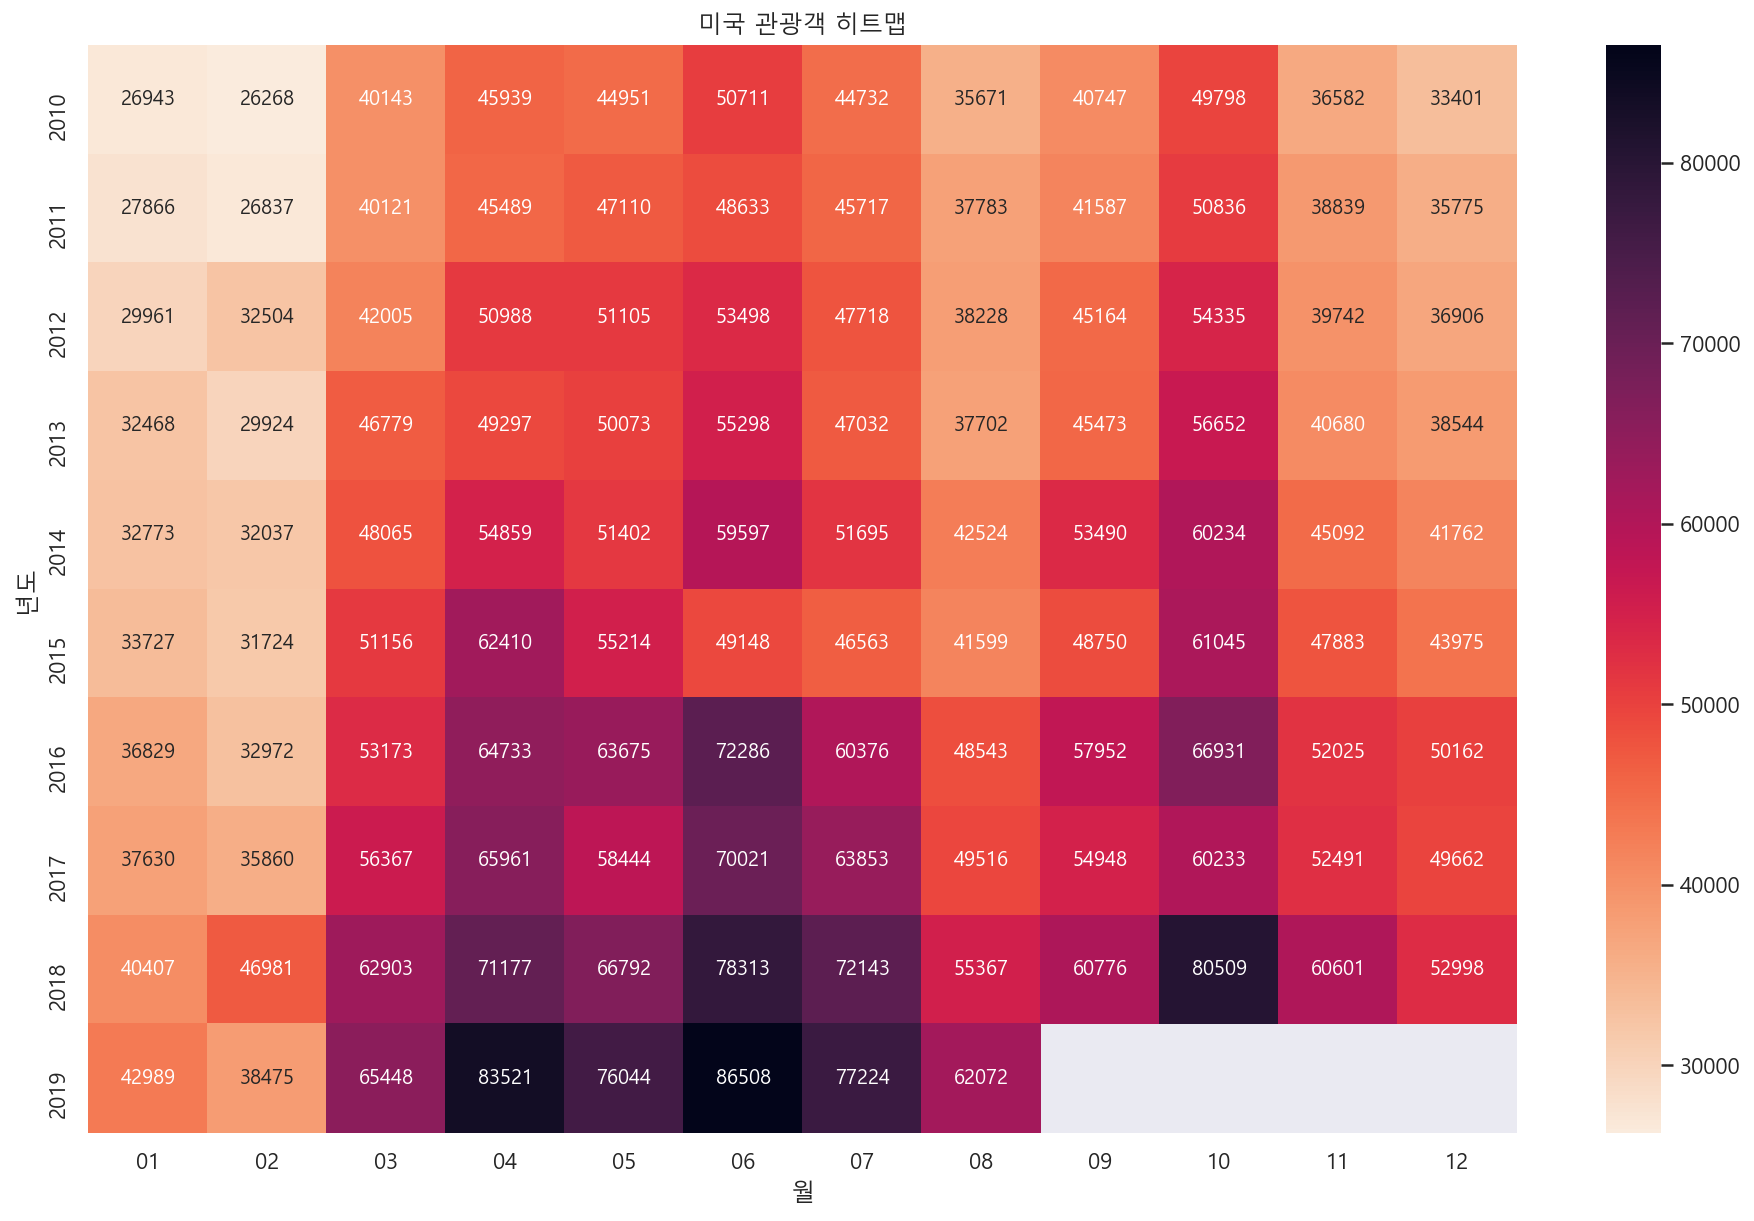

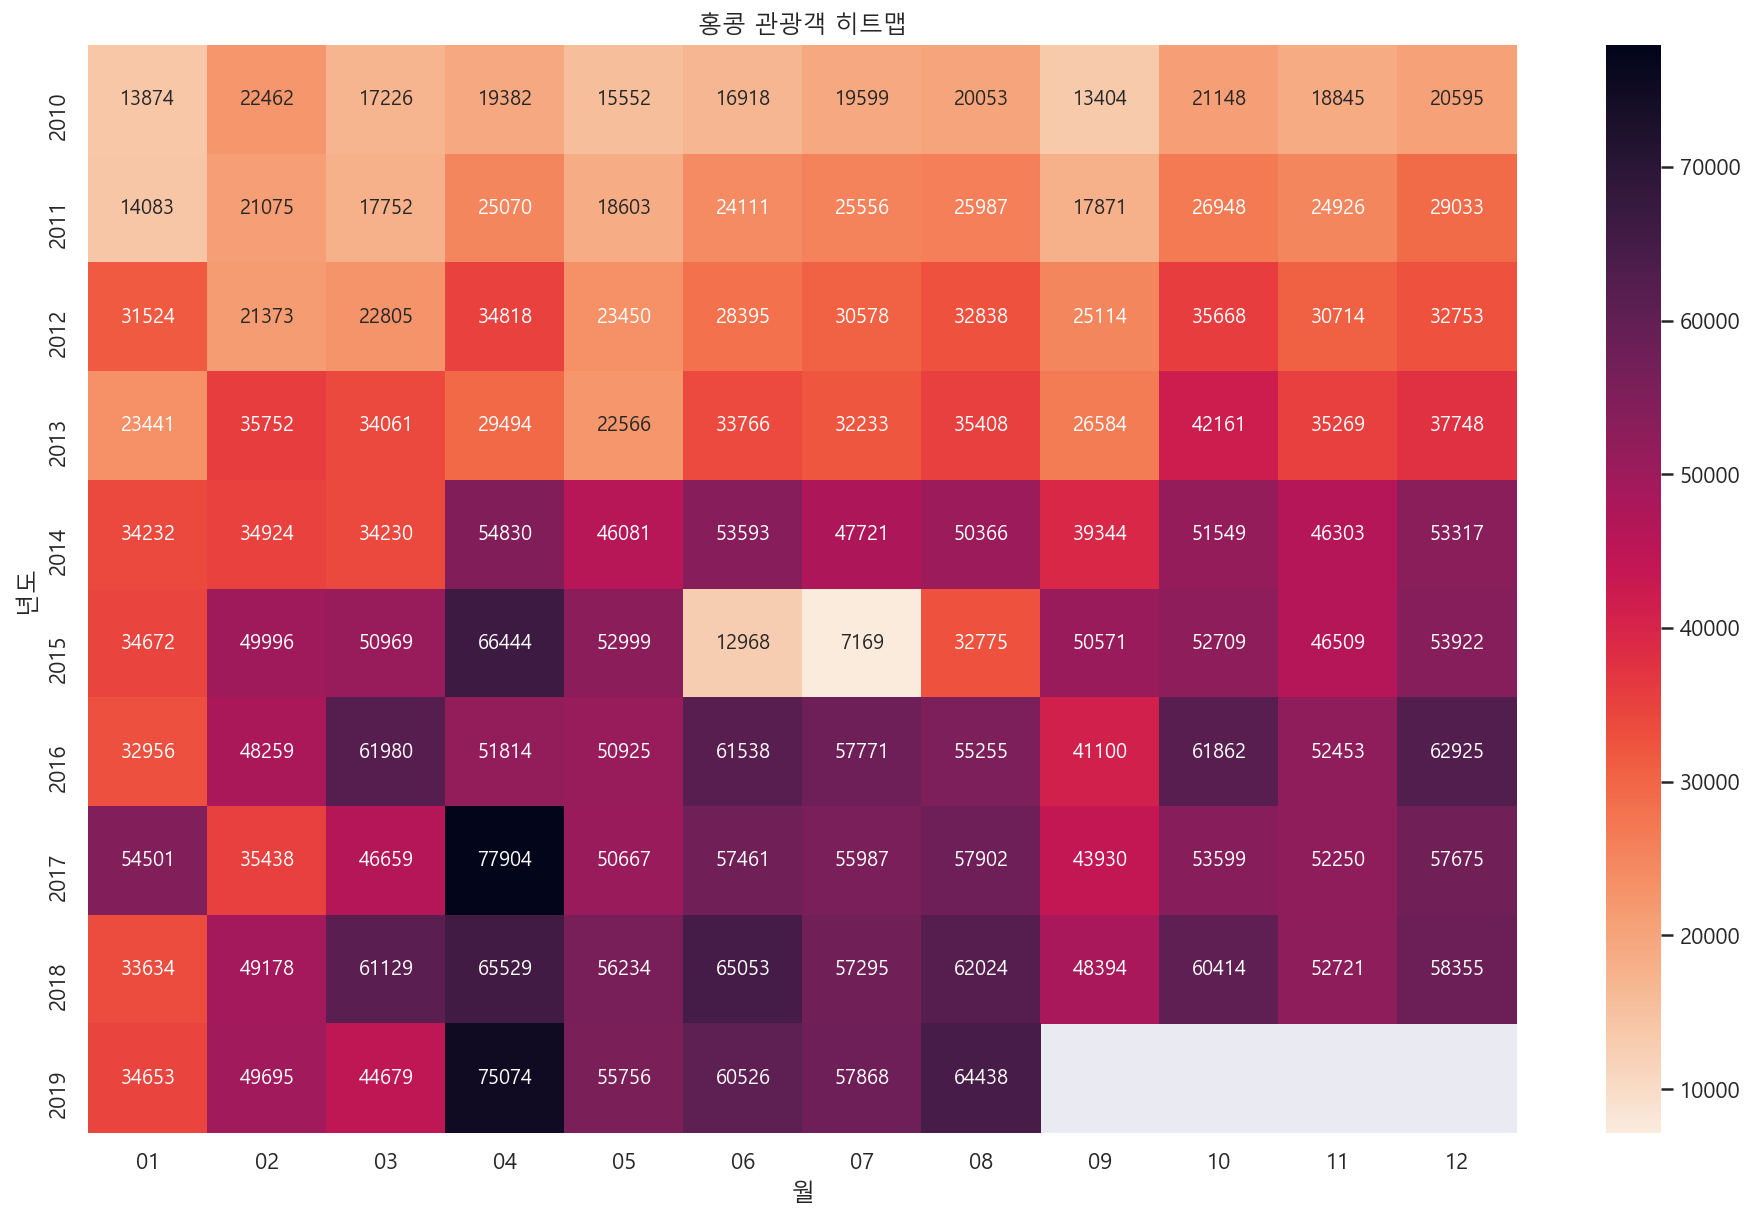

In [93]:
#반복문으로 상위 5개국 대한 히트맵 그래프 그리기
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도', 
                                 columns = '월')
    
    #그래프 크기 설정
    plt.figure(figsize = (16, 10))

    #히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
#히트맵 그래프로 나타낼 데이터 저장, annot = True 히트맵 그래프에 각 칸에 실제 값을 표시, fmt = '.0f' 숫자형태 소수점이 없는 실수형
#cmap = 'rocket_r' 그래프의 색깔 조합을 지정함.

    #그래프 타이틀 달기
    plt.title(f'{cntry} 관광객 히트맵')

#그래프 표현
plt.show()
    

In [ ]:
#finally 시각화 해석하기!